---

#### **Introduction**

---

##### **Code for use solar irradiation historic data to prediction next values without using ML models**

Developer: Matheus Henrique da Silva.

Control and Automation Engineering Student.

Universidade Tecnológica Federal do Paraná, Cornélio Procópio, Paraná, Brasil. 

E-mail: matheussilva.2019@alunos.utfpr.edu.br. 

ID Lattes: 5450995625966991.

---

#### **Step 0 - Importing Libraries**

---

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

---

#### **Step 1 - Data treatment**

---

In [2]:
# Data between 2010 and 2021 from 12 cities according to Cornélio Procópio

data_CP = pd.read_csv('local.csv')

data_CP = data_CP.drop(["Unnamed: 0"], axis=1)

display(data_CP)

,data,hora,latitude,longitude,radiacao,temperatura,umidade,precipitacao,pressao_atm,temp_orvalho,direcao_vento,vento_maximo,velocidade
0,2010-01-01,0,-23.500788,-50.728500,-3.322600,22.520000,84.800000,0.000000,944.980000,19.820000,142.600000,5.82,3.180000
1,2010-01-01,1,-23.500788,-50.728500,-3.203600,22.220000,84.800000,0.000000,944.480000,19.480000,139.200000,5.72,3.100000
2,2010-01-01,2,-23.500788,-50.728500,-3.016000,22.040000,84.800000,0.000000,944.020000,19.340000,136.600000,5.36,2.860000
3,2010-01-01,3,-23.500788,-50.728500,-3.282200,21.740000,85.200000,0.000000,943.540000,19.080000,142.600000,5.84,3.120000
4,2010-01-01,4,-23.500788,-50.728500,-3.101400,21.480000,85.600000,0.000000,943.460000,18.960000,139.800000,6.76,3.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97096,2021-02-01,19,-22.972476,-51.096268,121.083333,26.383333,74.833333,0.000000,955.900000,21.516667,238.666667,2.85,0.400000
97097,2021-02-01,20,-23.035317,-50.888616,-1.548800,25.060000,79.600000,0.000000,952.960000,21.200000,195.800000,1.72,0.100000
97098,2021-02-01,21,-23.561295,-50.686578,-2.315000,20.700000,95.000000,2.400000,947.533333,19.900000,169.000000,5.40,0.600000
97099,2021-02-01,22,-23.561295,-50.686578,-2.445333,20.433333,95.333333,0.866667,947.300000,19.666667,161.666667,2.60,0.866667


##### **Step 1.1 - Data training**

In [184]:
# Selecting the period for training

date_start_train = '2016-06-01'
date_end_train = '2016-06-31'

data_CP_train = data_CP[(data_CP['data'] >= date_start_train) & (data_CP['data'] <= date_end_train)]

display(data_CP_train)

,data,hora,latitude,longitude,radiacao,temperatura,umidade,precipitacao,pressao_atm,temp_orvalho,direcao_vento,vento_maximo,velocidade
56133,2016-06-01,0,-23.422701,-50.904590,-1.877875,16.975000,95.750000,0.000000,948.050000,16.262500,154.625000,1.625000,0.362500
56134,2016-06-01,1,-23.422701,-50.904590,-2.241750,16.587500,95.875000,0.000000,947.750000,15.937500,180.625000,1.400000,0.325000
56135,2016-06-01,2,-23.277769,-50.753381,-1.832857,17.057143,96.000000,0.028571,948.771429,16.371429,125.857143,1.142857,0.200000
56136,2016-06-01,3,-23.277769,-50.753381,-1.900714,16.928571,96.000000,0.000000,948.485714,16.271429,139.857143,1.357143,0.428571
56137,2016-06-01,4,-23.277769,-50.753381,-2.034714,17.028571,96.142857,0.000000,948.385714,16.400000,145.714286,1.328571,0.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56848,2016-06-30,19,-23.421876,-50.868278,-3.296111,19.100000,68.000000,0.000000,954.011111,12.922222,140.111111,2.600000,1.366667
56849,2016-06-30,20,-23.421876,-50.868278,-3.540000,18.100000,72.333333,0.000000,954.344444,12.966667,177.111111,3.311111,1.933333
56850,2016-06-30,21,-23.421876,-50.868278,-3.533000,17.300000,68.555556,0.000000,953.888889,11.288889,149.333333,3.066667,1.177778
56851,2016-06-30,22,-23.421876,-50.868278,-3.527889,16.933333,70.333333,0.000000,954.322222,11.311111,148.111111,3.044444,1.144444


In [33]:
# Selecting irradiation data for training

data_train = data_CP_train['radiacao']
data_train.reset_index(drop=True, inplace=True)

display(data_train)

0     -1.877875
1     -2.241750
2     -1.832857
3     -1.900714
4     -2.034714
         ...   
715   -3.296111
716   -3.540000
717   -3.533000
718   -3.527889
719   -3.539778
Name: radiacao, Length: 720, dtype: float64

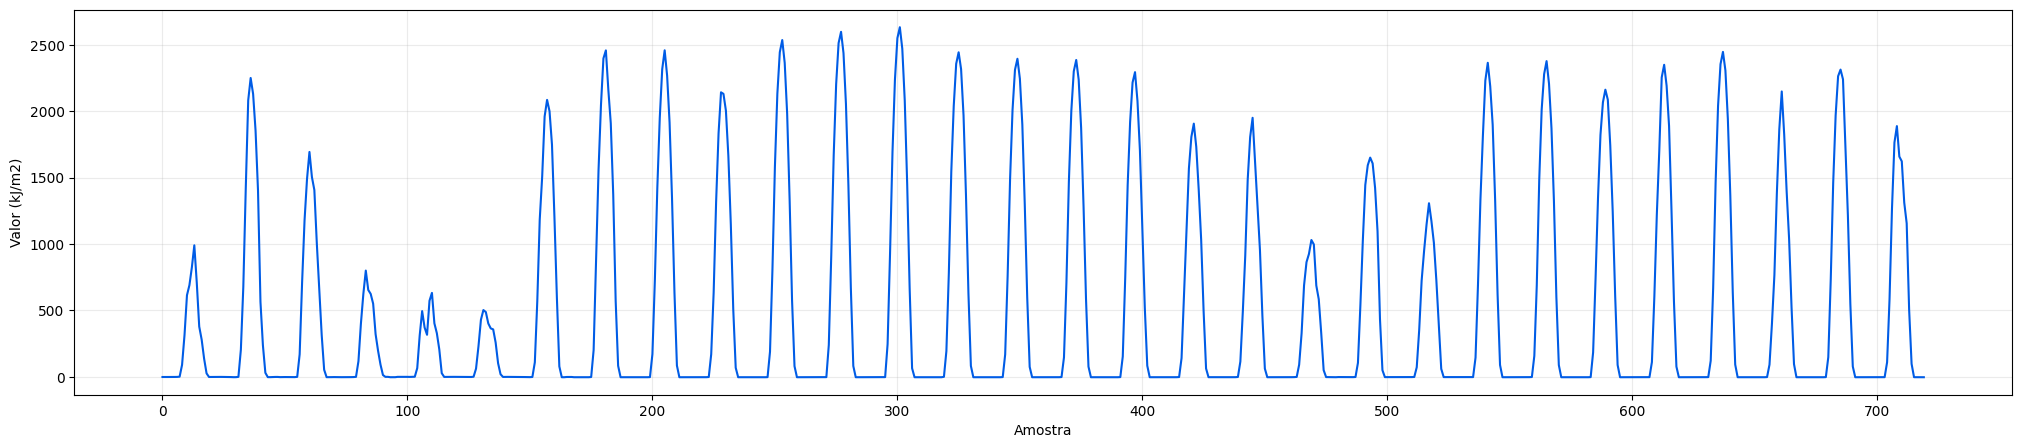

In [7]:
# Plot the irradiation data

plot = data_train.plot(y='radiacao', figsize=(25, 5), color = '#005ce6')

plot.grid(alpha=0.25)

plt.xlabel('Amostra')
plt.ylabel('Irradiação (kJ/m2)')

plt.savefig(f'local.pdf', format='pdf')

plt.show()

##### **Step 1.2 - Normalization**

In [35]:
# Data normalization according to min max scale

def normalization_minmax(data):

    min_val = data.min()
    max_val = data.max()

    data_norm = (data - min_val) / (max_val - min_val)

    return data_norm

In [10]:
# Data denormalization according to min max scale

def reversao_normalizacao(data, original_data):

    min_val = original_data.min()
    max_val = original_data.max()

    data_denorm = data * (max_val - min_val) + min_val

    return data_denorm

In [36]:
data_train_norm = normalization_minmax(data_train)

In [37]:
# Checking normalization

min = data_train_norm.values.min()
max = data_train_norm.values.max()

print(f'min = {min} \n max = {max}')

min = 0.0 
 max = 1.0


In [38]:
# Data to pd.DataFrame

data_train_norm = data_train_norm.to_frame()

##### **Step 1.3 - Data testing**

In [185]:
# Selecting the period for test

date_start_test = '2016-07-01'
date_end_test = '2016-07-15'

data_CP_test = data_CP[(data_CP['data'] >= date_start_test) & (data_CP['data'] <= date_end_test)]

display(data_CP_test)

,data,hora,latitude,longitude,radiacao,temperatura,umidade,precipitacao,pressao_atm,temp_orvalho,direcao_vento,vento_maximo,velocidade
56853,2016-07-01,0,-23.294958,-50.731431,-3.376500,16.587500,74.500000,0.000000,955.875000,11.875000,117.625000,4.387500,1.537500
56854,2016-07-01,1,-23.294958,-50.731431,-3.509750,16.200000,75.125000,0.000000,955.562500,11.637500,189.000000,4.400000,2.237500
56855,2016-07-01,2,-23.294958,-50.731431,-3.537125,15.662500,76.625000,0.000000,955.137500,11.400000,164.625000,4.625000,2.275000
56856,2016-07-01,3,-23.294958,-50.731431,-3.538750,15.237500,78.375000,0.000000,954.650000,11.350000,199.000000,4.737500,2.012500
56857,2016-07-01,4,-23.294958,-50.731431,-3.539125,14.800000,79.250000,0.000000,954.512500,11.087500,90.125000,4.962500,2.162500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57208,2016-07-15,19,-23.164392,-50.806676,-2.963556,20.977778,67.777778,0.422222,946.588889,14.366667,135.000000,4.822222,1.566667
57209,2016-07-15,20,-23.164392,-50.806676,-3.029889,20.244444,71.333333,0.000000,946.455556,14.488889,97.555556,3.611111,1.044444
57210,2016-07-15,21,-23.164392,-50.806676,-3.531778,21.355556,54.333333,0.000000,948.477778,11.255556,158.111111,2.700000,0.833333
57211,2016-07-15,22,-23.164392,-50.806676,-3.531111,20.355556,57.666667,0.000000,948.700000,11.244444,127.444444,2.322222,0.666667


In [186]:
data_test = data_CP_test['radiacao']
data_test.reset_index(drop=True, inplace=True)

display(data_test)

0     -3.376500
1     -3.509750
2     -3.537125
3     -3.538750
4     -3.539125
         ...   
355   -2.963556
356   -3.029889
357   -3.531778
358   -3.531111
359   -3.525667
Name: radiacao, Length: 360, dtype: float64

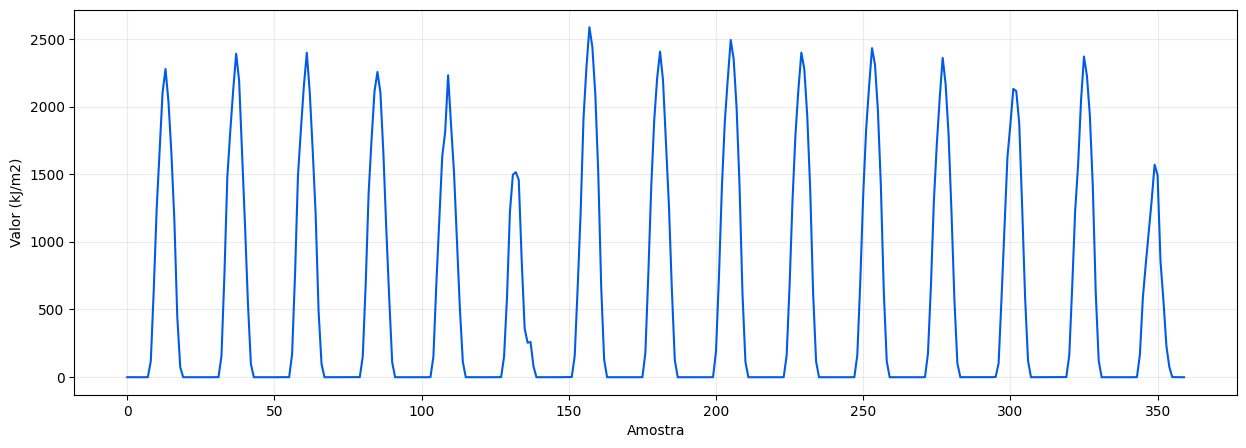

In [187]:
# Plot the irradiation data

plot = data_test.plot(y='radiacao', figsize=(15, 5), color = '#005ce6')

plot.grid(alpha=0.25)

plt.xlabel('Amostra')
plt.ylabel('Irradiação (kJ/m2)')

plt.savefig(f'local.pdf', format='pdf')

plt.show()

In [189]:
data_test_norm = normalization_minmax(data_test)

In [190]:
min = data_test_norm.values.min()
max = data_test_norm.values.max()

print(f'min = {min} \n max = {max}')

min = 0.0 
 max = 1.0


In [191]:
data_test_norm = data_test_norm.to_frame()

---

#### **Step 2 - Development - TDNN - Time Delay Neural Network**

---

#### Função que reordenada o vetor de dados históricos em tabela para a TDNN

In [15]:
## DATA
# X -> dados historicos

## NN STRUCTURE
# np -> num. de entradas

def dataframe_to_TDNN(X, Np):
    # tamanho da amostra temporal
    N = len(X)

    # Ajustando o index para 1...N
    X.index = range(1, N + 1)
    X = X.T

    # Define numero de linhas
    n_rows = (N - Np)

    # Criar lista de dicionários para as linhas
    data = []

    # Preenchendo a lista com os dados atrasados segundo Np e d (saida desejada)
    for i in range((Np + 1), (N + 1)):
        row_dict = {f'x{n}': float(X[i - j]) for j, n in enumerate(range(1, Np + 1), start=1)}
        row_dict['d'] = float(X[i])
        data.append(row_dict)

    # Criar o DataFrame
    df_train = pd.DataFrame(data)

    return df_train, df_train.iloc[:, :-1], df_train[['d']]

---

### Algoritmo de Treinamento da rede neural TDNN

---

In [17]:
# valor maximo de epocas
MAX_EPOCA = int(10e+6)

# Taxa de aprendizado
n = 0.2

# Fator de momentum
m = 0.5

# Precisao
p = 10e-9

Funcao logistica (sigmoide):

$f(u) = 1 / (1 + e^{(-β*u)})$

sendo $β$ o fator de inclinacao da funcao e $u$ a entrada

In [18]:
def func_ativacao(u, beta):

    g = 1 / (1 + np.exp(-beta * u))

    return g

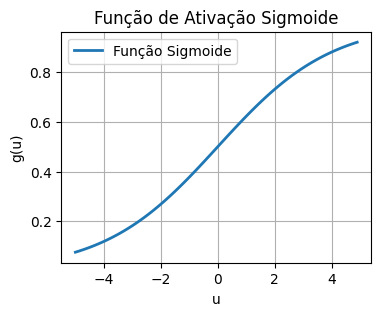

In [18]:
# Plot Funcao de Ativacao

u = np.arange(-5,5,0.1)
resultado = func_ativacao(u, 0.5)

plt.figure(figsize=(4, 3))
plt.plot(u, resultado, label='Função Sigmoide', linewidth=2)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('Função de Ativação Sigmoide')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
def func_ativacao_derivada(u, beta):
    
    num = (beta * np.exp(-beta * u))
    den = ((np.exp(-beta * u) + 1) ** 2)

    gd = num/den

    return gd

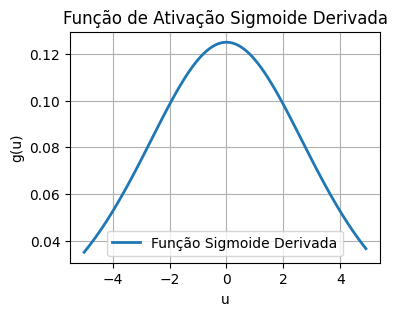

In [20]:
# Plot Funcao de Ativacao Derivada

u = np.arange(-5,5,0.1)
resultado = func_ativacao_derivada(u, 0.5)

plt.figure(figsize=(4, 3))
plt.plot(u, resultado, label='Função Sigmoide Derivada', linewidth=2)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('Função de Ativação Sigmoide Derivada')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
## DATA
# data -> dados historicos

## PARAMETERS
# n -> taxa de aprendizado
# m -> fator de momentum
# p -> precisao
# beta -> inclinacao da funcao de ativao
# MAX_EPOCA -> épocas máximas de treinamento

## NN STRUCTURE
# Nt -> num. de treinamentos
# Np -> num. de entradas
# Ni -> num. de neuronio na H.L. 1 (H.L. = camada escondida)

def treinamento_TDNN(data, n, m, p, beta, MAX_EPOCA, Nt, Np, Ni):

    data_yn = data.copy()

    N = len(data)

    # Selecionando as ultimas Np amostras dos dados historicos (X)
    data_train, df_entradas, df_alvo = dataframe_to_TDNN(data, Np)

    # Adiciona coluna do limiar de ativacao = -1 (bias) no conjunto de dados
    df_entradas['bias'] = -1

    # Transformando os dataframes em array's
    X = np.array(df_entradas)
    d = np.array(df_alvo)
    d = d.reshape(-1, 1)

    # Lista de matrizes de pesos sinapticos iniciais (i) e ajustados (adj) de cada camada
    lista_Wi_1 = []
    lista_Wi_2 = []

    lista_W_1_adj = []
    lista_W_2_adj = []

    # Lista com as saidas de cada treino
    lista_y = []
    
    # Inicializando os treinamentos
    for n_treino in range(Nt):

        print('-'*30)
        print(f'Treinamento TDD (Np = -{Np}) numero: {n_treino + 1}')
        print('-'*30)
        
        # Contador de epocas
        epoca = 0

        # Vetor de erros
        lista_erros = np.zeros(MAX_EPOCA)
        # E(t) = x(t) - y(t), onde (Np+1) <= t <= N
        # sendo N = len(X)
        # portanto: Erro = d(t) - y(t)

        # Pesos aleatorios entre 0 e 1 do {n_treino}
        # (Ni, 1) -> (Ni neuronios, Np entrada + 1 bias)
        W_1 = np.random.randn(Ni, (Np+1))
        lista_Wi_1.append(W_1)

        # Pesos aleatorios entre 0 e 1 do n_treino
        # (1, Ni) -> (1 neuronios, Ni entradas)
        W_2 = np.random.randn(1, (Ni+1))
        lista_Wi_2.append(W_2)

        # matriz sinaptica anterior = atual (para a primeira epoca)
        #W_1_ant = W_1
        #W_2_ant = W_2

        W_1_ant = np.zeros((Ni, (Np+1)))
        W_1_ant = np.array(W_1_ant)
        W_2_ant = np.zeros((1, (Ni+1)))
        W_2_ant = np.array(W_2_ant)


        while(epoca < MAX_EPOCA):

            # print(f'ÉPOCA {epoca}')

            #######################
            # ETAPAS FEED FORWARD #
            #######################
            
            # **CAMADA 1 - HIDDEN**

            # Entrada I_1 = X * W_1
            I_1 = X.dot(W_1.T)

            # Saida Y_1 = g(I_1)
            Y_1 = func_ativacao(I_1, beta)
            
            # **CAMADA 2 - OUT**

            # Adicao do bias
            Y_1 = pd.DataFrame(Y_1)
            Y_1['bias'] = -1
            Y_1 = np.array(Y_1)

            # Entrada I_2 = Y_1 * W_2
            I_2 = (Y_1).dot(W_2.T)

            # Saida Y_2 = g(I_2)
            Y_2 = func_ativacao(I_2, beta)

            # Erro da previsao FOWARD
            lista_erros[epoca] = np.mean((d - Y_2) ** 2)

            if epoca == 0:
                print('erro 0    >>', lista_erros[epoca])
            
            ######################
            # ETAPAS DE BACKWARD #
            ######################

            # **CAMADA 2 - OUT**

            # ta = termo de aprendizagem

            # tm = termo de momentum

            gd_2 = func_ativacao_derivada(I_2, beta)

            erro_2 = d - Y_2

            delta_2 = erro_2 * gd_2
            
            ta_2 = ((n * delta_2).T).dot(Y_1)

            tm_2 = m * (W_2 - W_2_ant)

            W_2_adj = W_2 + tm_2 + ta_2
            
            # **CAMADA 1 - HIDDEN**

            gd_1 = func_ativacao_derivada(I_1, beta)

            delta_1 = (delta_2.dot(W_2_adj[:, :-1])) * gd_1

            ta_1 = ((n * delta_1).T).dot(X)

            tm_1 = m * (W_1 - W_1_ant)

            W_1_adj = W_1 + tm_1 + ta_1

            #########################################
            # Calculo das saidas ajustadas Y_2_n_bp #
            #########################################

            I_1_bp = X.dot(W_1_adj.T)
            Y_1_bp = func_ativacao(I_1_bp, beta)

            # Adicao do bias
            Y_1_bp = pd.DataFrame(Y_1_bp)
            Y_1_bp['bias'] = -1
            Y_1_bp = np.array(Y_1_bp)

            I_2_bp = (Y_1_bp).dot(W_2_adj.T)
            Y_2_bp = func_ativacao(I_2_bp, beta)

            # Erro da previsao PÓS-BACKWARD

            lista_erros[epoca + 1] = np.mean((d - Y_2_bp) ** 2)

            # Incremente de epoca
            epoca = epoca + 1

            print(f'erro {epoca}    >> {lista_erros[epoca]}')

            # Busca pela precisao

            if (abs(lista_erros[epoca]) < 0.05):

                print(f'Convergência em {epoca} épocas')
                print(f'Erro Médio Quadrático = {np.mean(lista_erros)}')

                # Armazena as matrizes de pesos sinapticos ajustados na lista
                lista_W_1_adj.append(W_1_adj)
                lista_W_2_adj.append(W_2_adj)

                # Armazena as saida pos back-propagation with momentum
                y_calc = pd.DataFrame(Y_2_bp, index=range((Np+1), (N+1)))
            
                lista_y.append(y_calc)
                
                # Grafico do erro
                plt.figure()
                plt.plot(np.arange(epoca+1), lista_erros[:epoca+1], linewidth=1)
                ttl = f'Erro pelas épocas (Treinamento {n_treino + 1})'
                plt.title(ttl)
                plt.ylabel('Erro Quadrático Médio')
                plt.xlabel('Épocas')
                
                plt.xlim(0, epoca)
                plt.ylim(0, 1)
                plt.grid()
                # plt.savefig(f'Fig/Erro_n_treino{n_treino + 1}_Np{Np}.pdf', format='pdf')
                plt.show()

                break

            # Atualiza as matrizes iniciais com as ajustadas
            W_1_ant = W_1 
            W_2_ant = W_2

            W_1 = W_1_adj
            W_2 = W_2_adj


    # Alocando os valores de treinamento no dataframe de treinamento
    for c in range(len(lista_y)):
        data_yn[c] = lista_y[c]

    column_names = ['f(t)'] + [f'y{n}' for n in range(1, Nt + 1)]

    data_yn.columns = column_names

    return data_train, data_yn, lista_W_1_adj, lista_W_2_adj

In [21]:
# Funcao para plotar o historico e seus valores calculados

def plot_historico(data, n, file_name):
    
    variable_names = data.columns[-n:]

    plot = data.plot(y=variable_names, figsize=(25, 5))
    plot.grid(alpha=0.25)
    plt.xlabel('Amostras')
    plt.ylabel('Valores')

    # Place legend outside the figure to the right
    plot.legend(variable_names, bbox_to_anchor=(1.01, 1), loc='upper left')

    plt.savefig(f'TDNN_ET42D/Figuras/{file_name}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

---

### Treinamento da rede neural TDNN

---

#### Atraso temporal de 1 dias (Np = 24*1 amostras)

------------------------------
Treinamento TDD (Np = -24) numero: 1
------------------------------
erro 1    >> 0.7127559139730215
erro 2    >> 0.02120166596641561
Convergência em 2 épocas
Erro Médio Quadrático = 8.396296897119004e-08


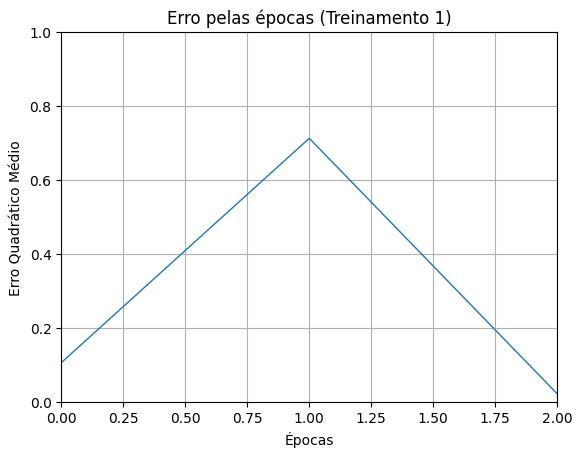

In [624]:
data_train1_1dia, data_ytrain1_1dia, W_1_train1_adj_1dia, W_2_train1_adj_1dia = treinamento_TDNN(data_train_norm, n, m, p, 0.5, MAX_EPOCA, 1, 24, 168)

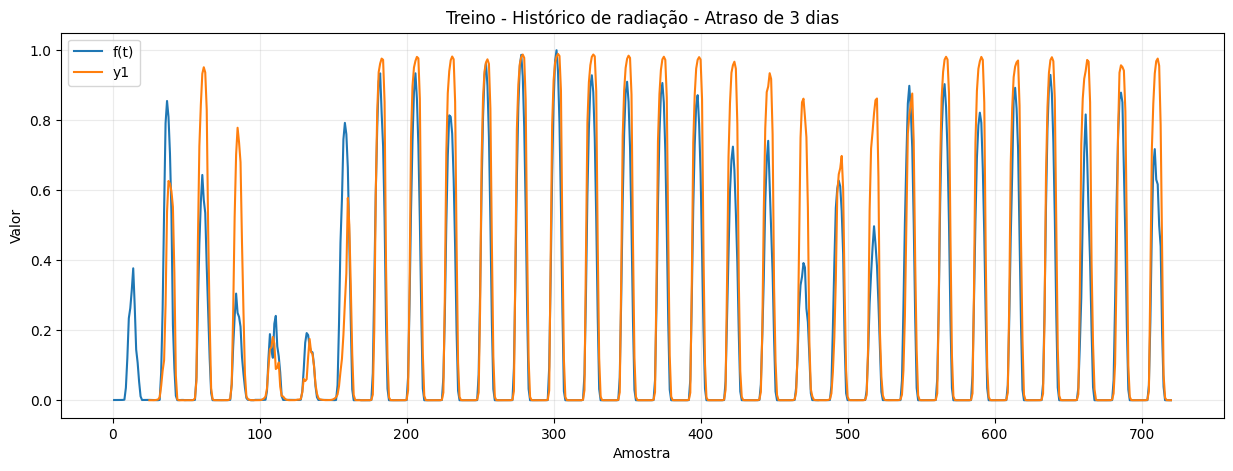

In [625]:
plot_historico(data_ytrain1_1dia, 2, 'treino_1_1dia')

------------------------------
Treinamento TDD (Np = -24) numero: 1
------------------------------
erro 0: 0.1269124992601685
erro 1    >> 0.12679360864944697
erro 2    >> 0.1269583631184884
erro 3    >> 0.12689919913454215
erro 4    >> 0.12668355389774638
erro 5    >> 0.1259061131987032
erro 6    >> 0.11884476347984886
erro 7    >> 0.037816210848938416
Convergência em 7 épocas
Erro Médio Quadrático = 9.168143115878829e-08


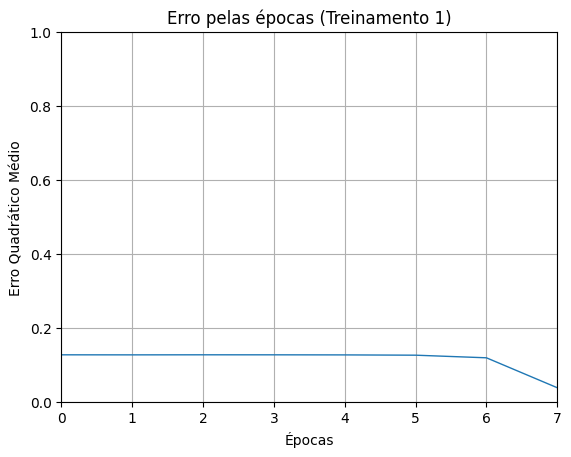

In [646]:
data_train2_1dia, data_ytrain2_1dia, W_1_train2_adj_1dia, W_2_train2_adj_1dia = treinamento_TDNN(data_train_norm, n, m, p, 0.5, MAX_EPOCA, 1, 24, 168)

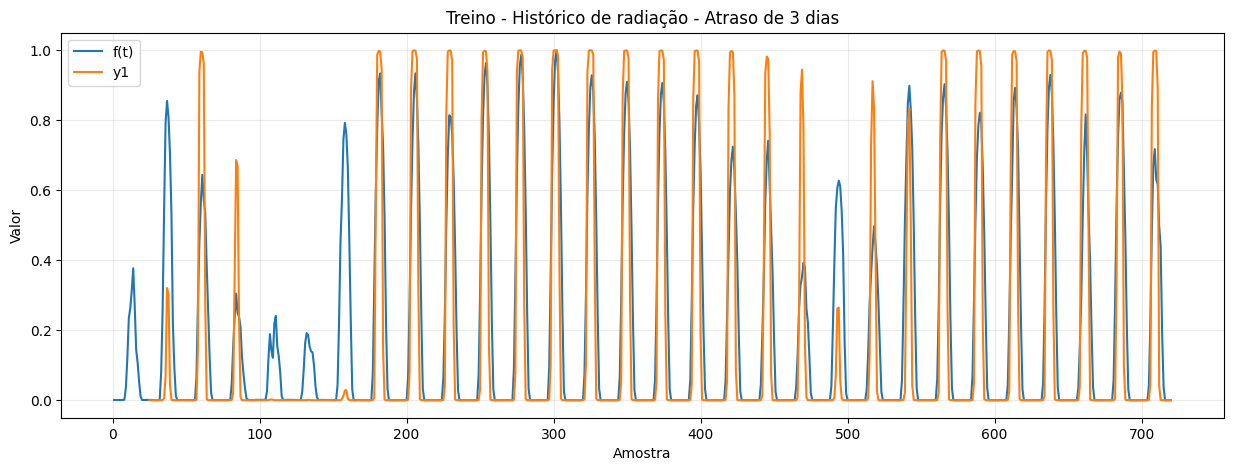

In [647]:
plot_historico(data_ytrain2_1dia, 2, 'treino_2_1dia')

------------------------------
Treinamento TDD (Np = -24) numero: 1
------------------------------
erro 0    >> 0.12370513852169371
erro 1    >> 0.12164995355199425
erro 2    >> 0.029496391238011465
Convergência em 2 épocas
Erro Médio Quadrático = 2.748514833116994e-08


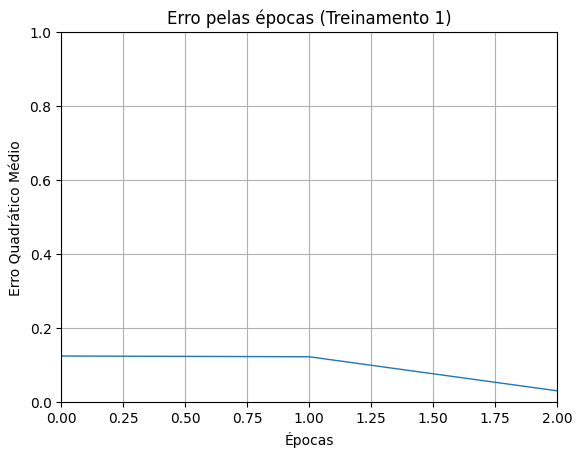

In [673]:
data_train3_1dia, data_ytrain3_1dia, W_1_train3_adj_1dia, W_2_train3_adj_1dia = treinamento_TDNN(data_train_norm, n, m, p, 0.5, MAX_EPOCA, 1, 24, 168)

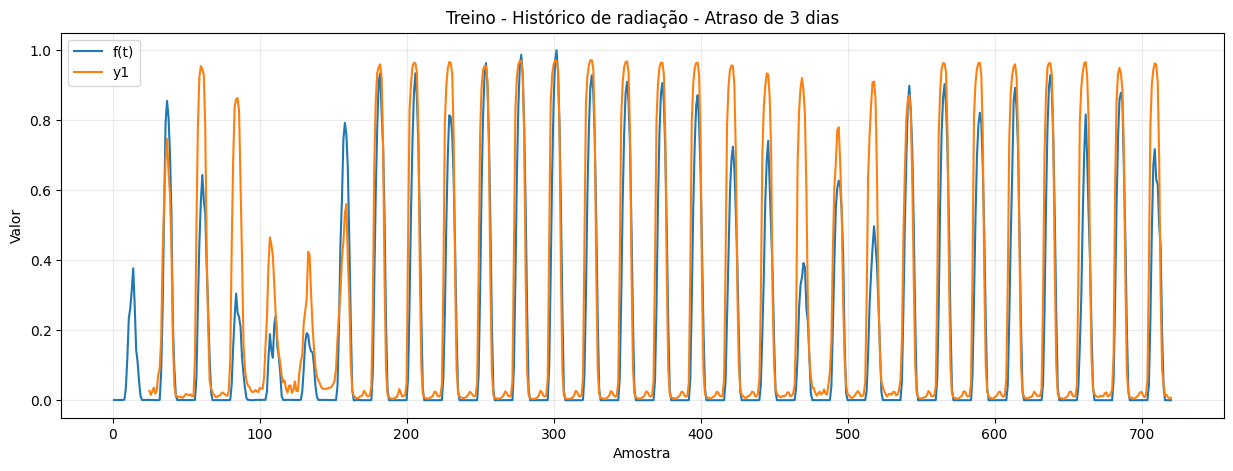

In [674]:
plot_historico(data_ytrain3_1dia, 2, 'treino_3_1dia')

#### Atraso temporal de 3 dias (Np = 24*3 amostras)

------------------------------
Treinamento TDD (Np = -72) numero: 1
------------------------------
erro 1    >> 0.12879860434890494
erro 2    >> 0.12882863525203506
erro 3    >> 0.1288309216727904
erro 4    >> 0.12883143309134007
erro 5    >> 0.12883160757228568
erro 6    >> 0.1288316795865632
erro 7    >> 0.1288317119710416
erro 8    >> 0.12883172697758813
erro 9    >> 0.1288317338525393
erro 10    >> 0.1288317367939
erro 11    >> 0.12883173779962795
erro 12    >> 0.12883173784407545
erro 13    >> 0.1288317374083339
erro 14    >> 0.12883173673142997
erro 15    >> 0.128831735932491
erro 16    >> 0.12883173507097745
erro 17    >> 0.1288317341765871
erro 18    >> 0.12883173326415442
erro 19    >> 0.1288317323410864
erro 20    >> 0.1288317314110779
erro 21    >> 0.12883173047596747
erro 22    >> 0.12883172953666605
erro 23    >> 0.12883172859362038
erro 24    >> 0.12883172764704515
erro 25    >> 0.12883172669703905
erro 26    >> 0.12883172574364266
erro 27    >> 0.12883172478686736
erro 2

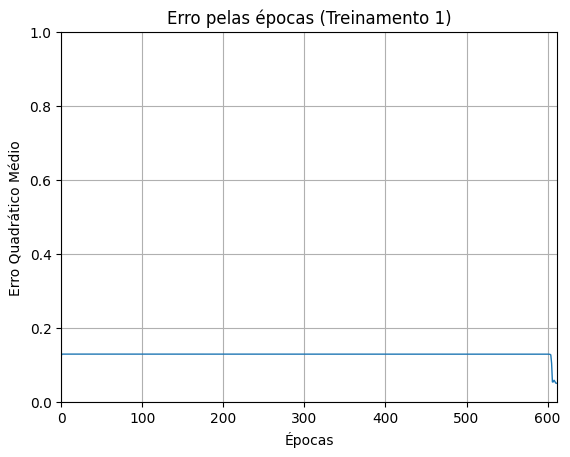

In [574]:
data_train1_3dia, data_ytrain1_3dia, W_1_train1_adj_3dia, W_2_train1_adj_3dia = treinamento_TDNN(data_train_norm, n, m, p, 0.5, MAX_EPOCA, 1, 24*3, 168)

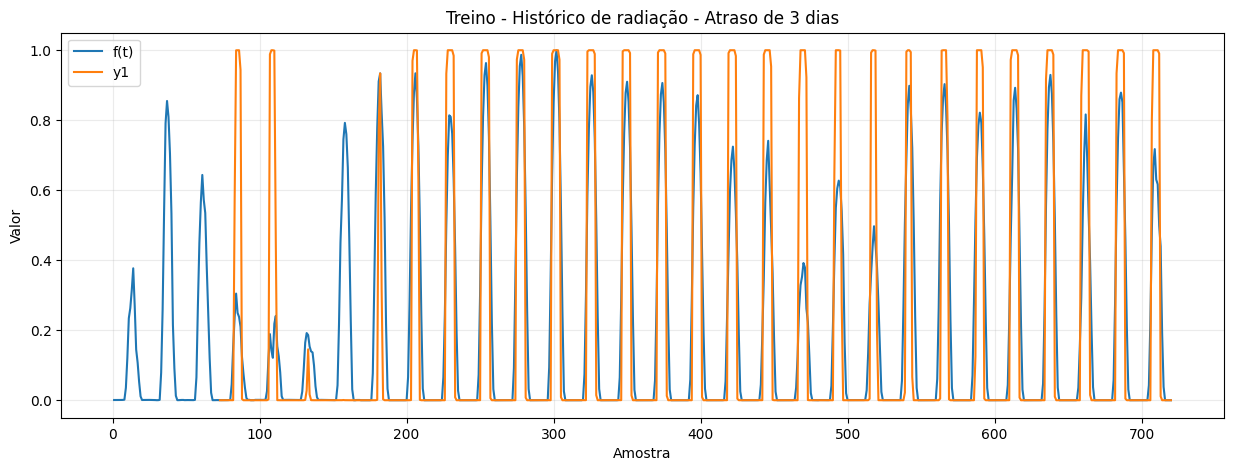

In [586]:
plot_historico(data_ytrain1_3dia, 2, 'treino_1_3dia')

------------------------------
Treinamento TDD (Np = -72) numero: 1
------------------------------
erro 1    >> 0.12412663373077278
erro 2    >> 0.06617612114102583
erro 3    >> 0.055297973425603775
erro 4    >> 0.050206903158891175
erro 5    >> 0.04778158114150243
Convergência em 5 épocas
Erro Médio Quadrático = 4.3429176967444896e-08


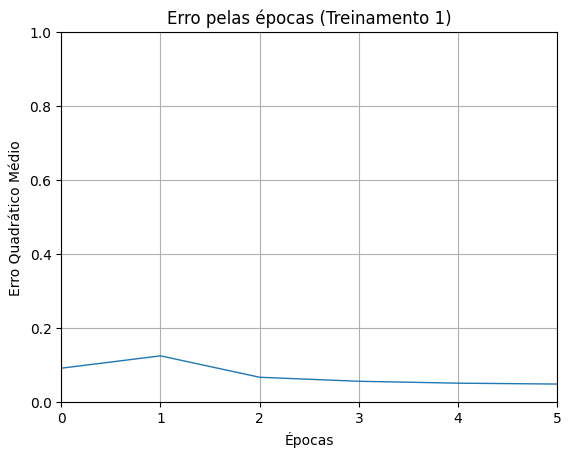

In [588]:
data_train2_3dia, data_ytrain2_3dia, W_1_train2_adj_3dia, W_2_train2_adj_3dia = treinamento_TDNN(data_train_norm, n, m, p, 0.5, MAX_EPOCA, 1, 24*3, 168)

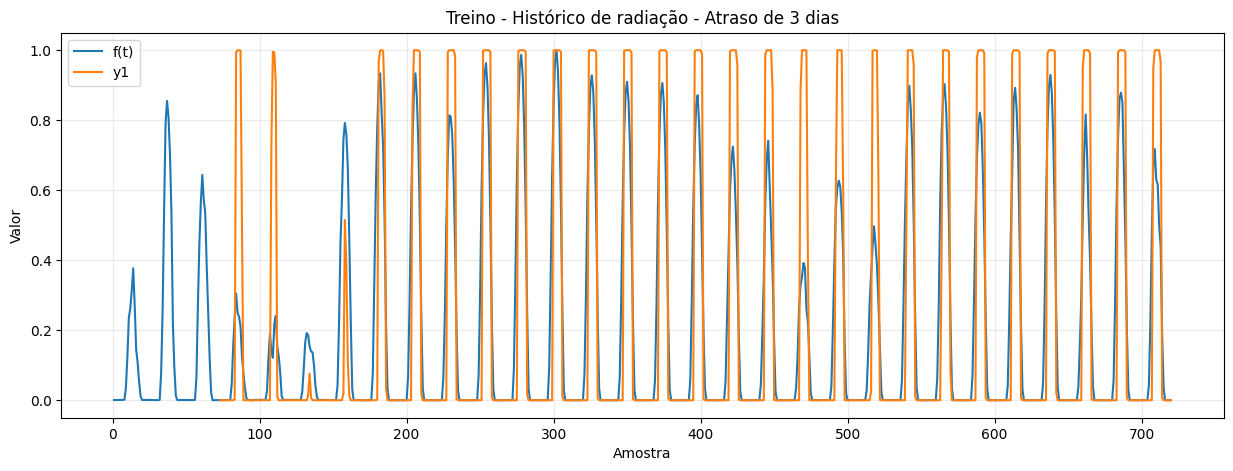

In [597]:
plot_historico(data_ytrain2_3dia, 2, 'treino_2_3dia')

------------------------------
Treinamento TDD (Np = -72) numero: 1
------------------------------
erro 1    >> 0.7297386833413596
erro 2    >> 0.7295062165698141
erro 3    >> 0.7277927692582994
erro 4    >> 0.6783018631658246
erro 5    >> 0.03821537608175266
Convergência em 5 épocas
Erro Médio Quadrático = 3.632578721098051e-07


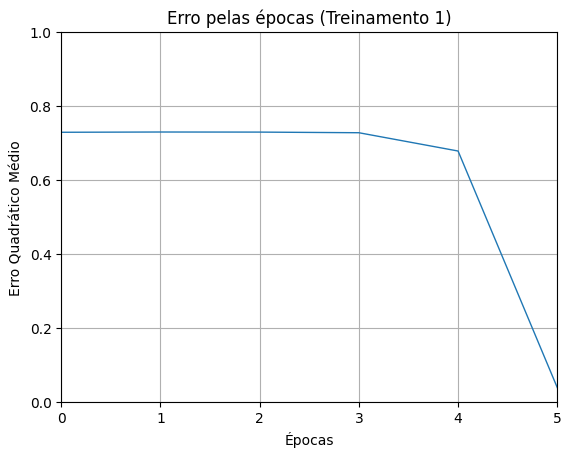

In [595]:
data_train3_3dia, data_ytrain3_3dia, W_1_train3_adj_3dia, W_2_train3_adj_3dia = treinamento_TDNN(data_train_norm, n, m, p, 0.5, MAX_EPOCA, 1, 24*3, 168)

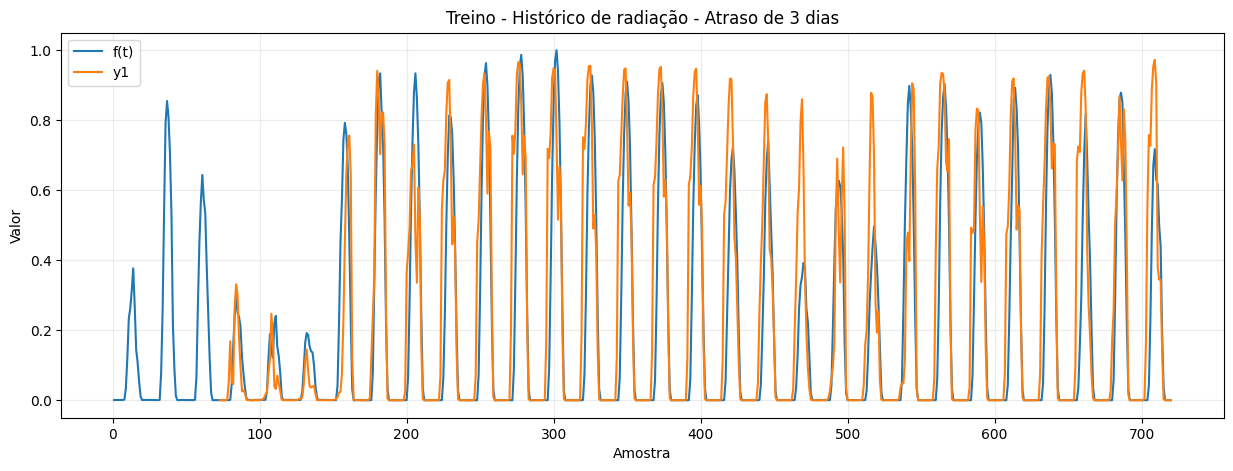

In [598]:
plot_historico(data_ytrain3_3dia, 2, 'treino_3_3dia')

#### Atraso temporal de 7 dias (Np = 24*7 amostras)

------------------------------
Treinamento TDD (Np = -168) numero: 1
------------------------------
erro 1    >> 0.04830265950646282
Convergência em 1 épocas
Erro Médio Quadrático = 1.854828687092715e-08


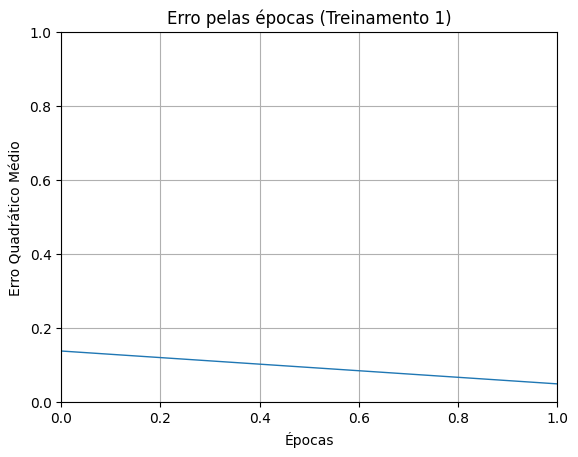

In [616]:
data_train1_7dia, data_ytrain1_7dia, W_1_train1_adj_7dia, W_2_train1_adj_7dia = treinamento_TDNN(data_train_norm, n, m, p, 0.5, MAX_EPOCA, 1, 24*7, 168)

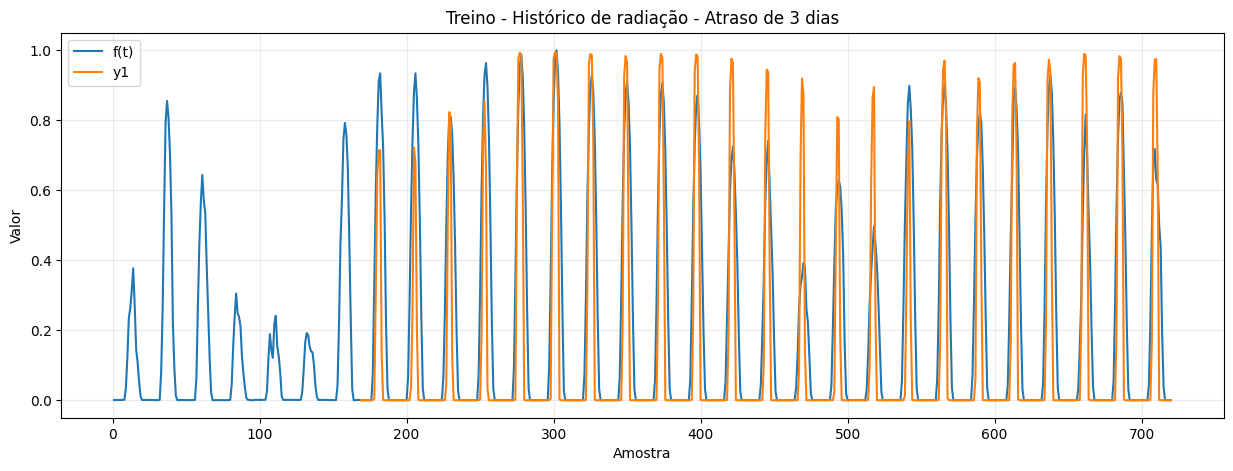

In [617]:
plot_historico(data_ytrain1_7dia, 2, 'treino_1_7dia')

------------------------------
Treinamento TDD (Np = -168) numero: 1
------------------------------
erro 0    >> 0.05720742269482431
erro 1    >> 0.08344376091448628
erro 2    >> 0.09327634607003696
erro 3    >> 0.0594009999176411
erro 4    >> 0.05805802943226898
erro 5    >> 0.05238447392495286
erro 6    >> 0.03963217421026255
Convergência em 6 épocas
Erro Médio Quadrático = 4.43403207164473e-08


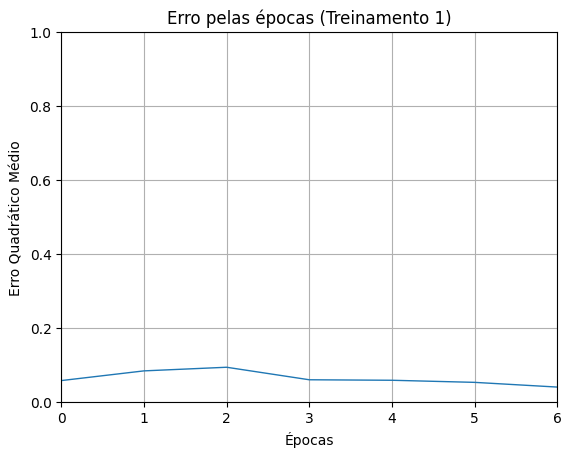

In [683]:
data_train2_7dia, data_ytrain2_7dia, W_1_train2_adj_7dia, W_2_train2_adj_7dia = treinamento_TDNN(data_train_norm, n, m, p, 0.5, MAX_EPOCA, 1, 24*7, 168)

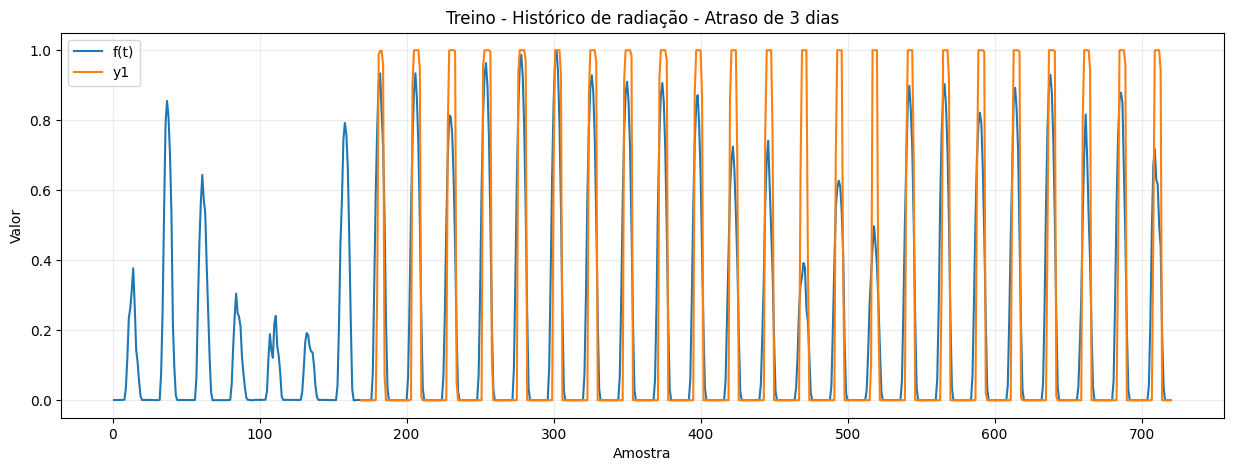

In [684]:
plot_historico(data_ytrain2_7dia, 2, 'treino_2_7dia')

------------------------------
Treinamento TDD (Np = -168) numero: 1
------------------------------
erro 0    >> 0.1453800871681362
erro 1    >> 0.144285611133695
erro 2    >> 0.14430737935122756
erro 3    >> 0.1443101894809156
erro 4    >> 0.1443109028636653
erro 5    >> 0.1443111574196878
erro 6    >> 0.1443112642011418
erro 7    >> 0.1443113122569359
erro 8    >> 0.14431133420960623
erro 9    >> 0.14431134386212593
erro 10    >> 0.14431134754122169
erro 11    >> 0.14431134827280287
erro 12    >> 0.14431134753620495
erro 13    >> 0.1443113460627531
erro 14    >> 0.14431134421600086
erro 15    >> 0.1443113421771648
erro 16    >> 0.14431134003667948
erro 17    >> 0.14431133783968544
erro 18    >> 0.14431133560870066
erro 19    >> 0.14431133335493762
erro 20    >> 0.14431133108395747
erro 21    >> 0.14431132879849567
erro 22    >> 0.14431132649987455
erro 23    >> 0.14431132418870948
erro 24    >> 0.14431132186526185
erro 25    >> 0.14431131952961565
erro 26    >> 0.1443113171817656
err

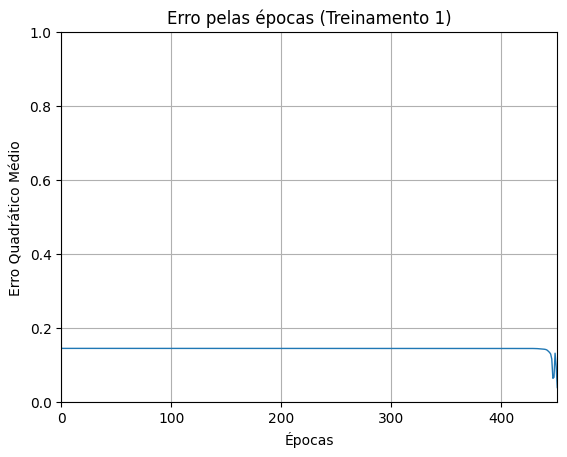

In [711]:
data_train3_7dia, data_ytrain3_7dia, W_1_train3_adj_7dia, W_2_train3_adj_7dia = treinamento_TDNN(data_train_norm, n, m, p, 0.5, MAX_EPOCA, 1, 24*7, 168)

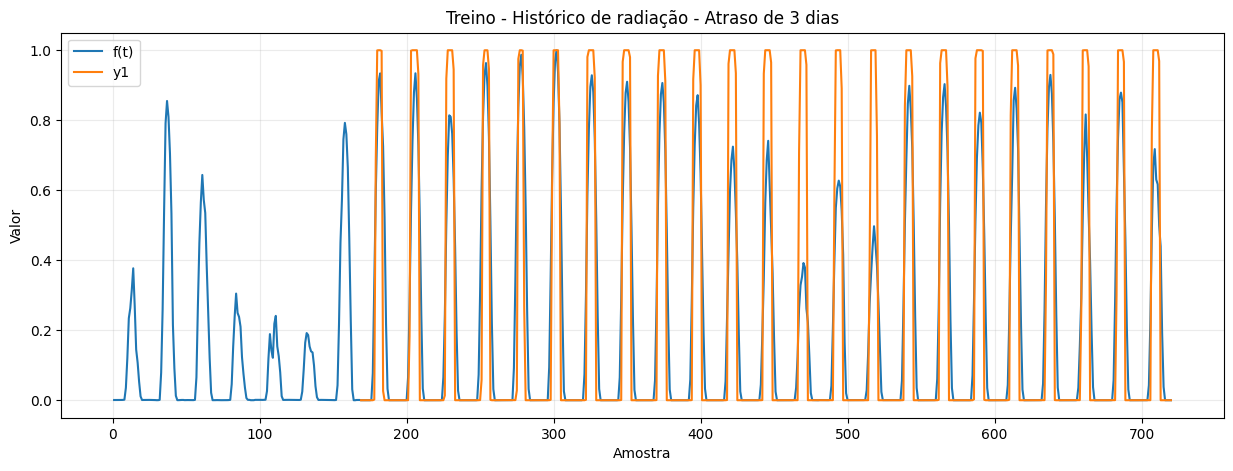

In [712]:
plot_historico(data_ytrain3_7dia, 2, 'treino_3_7dia')

In [713]:
# Salvar a matriz de pesos sinapticos

for i, array in enumerate(W_1_train3_adj_7dia):

    csv_file = f'TDNN_ET42D/Wn_pesos/W1_adj_7dia_treino3.csv'
    np.savetxt(csv_file, array, delimiter=',')

for i, array in enumerate(W_2_train3_adj_7dia):

    csv_file = f'TDNN_ET42D/Wn_pesos/W2_adj_7dia_treino3.csv'
    np.savetxt(csv_file, array, delimiter=',')

---


### Algoritmo de Teste da rede neural TDNN

---

In [162]:
def dataframe_to_test(data, data_teste, Np):

    data_Np = data[-Np:]

    array_train = pd.concat([data_Np, data_teste], axis=0, ignore_index=False)

    df_teste, df_teste_entradas, df_teste_alvo = dataframe_to_TDNN(array_train, Np)

    df_teste.index = range(len(data) + 1, len(data) + len(data_teste) + 1)

    return df_teste, df_teste_entradas, df_teste_alvo

In [163]:
def teste(X_teste, lista_W_1_adj, lista_W_2_adj, beta):

    X_teste = np.array(X_teste)

    #######################
    # ETAPAS FEED FORWARD #
    #######################
    
    # entradas I_1 e saida Y_1 da camada 1

    I_1 = X_teste.dot(lista_W_1_adj.T)

    Y_1 = func_ativacao(I_1, beta)

    # Adicao do bias
    Y_1 = pd.DataFrame(Y_1)
    Y_1['bias'] = -1
    Y_1 = np.array(Y_1)
    
    # entrada I_2 e saida Y_2 da camada 2 de saída

    I_2 = (Y_1).dot(lista_W_2_adj.T)

    Y_2 = func_ativacao(I_2, beta)

    return Y_2

In [172]:
def teste_TDNN(data, data_teste, lista_W_1_adj, lista_W_2_adj, beta, Nt, Np):

    lista_ytest = []

    lista_df_teste = []
    lista_teste_entradas = []
    lista_teste_alvo = []

    # Prepara a matriz para os calculos para cada modelo de TDNN
    for i in range(Nt):

        # print(Np[i], type(Np[i]))
        df_teste, df_teste_entradas, df_teste_alvo = dataframe_to_test(data, data_teste, Np[i])

        # print(f'df_teste[{i}]', df_teste)

        lista_df_teste.append(df_teste)
        lista_teste_entradas.append(df_teste_entradas)
        lista_teste_alvo.append(df_teste_alvo)

    lista_X_teste = []
    lista_data_yteste = []
    lista_d_teste = []

    # Prepara os vetores para os calculos para cada modelo de TDNN

    for i in range(Nt):

        X_teste = (lista_teste_entradas[i]).copy()
        X_teste['bias'] = -1
        X_teste = np.array(X_teste)

        data_yteste = (lista_teste_alvo[i]).copy()

        d_teste = np.array(lista_teste_alvo[i])
        d_teste = d_teste.reshape(-1, 1)

        lista_X_teste.append(X_teste)
        lista_data_yteste.append(data_yteste)
        lista_d_teste.append(d_teste)

    
    # Realiza o teste para cada modelo de TDNN
    for i in range(Nt):

        print('-'*30)
        print(f'Teste TDDN (Np = -{Np[i]})')
        print('-'*30)

        Y_2 = teste(lista_X_teste[i], lista_W_1_adj[i], lista_W_2_adj[i], beta)

        y_calc = pd.DataFrame(Y_2, index=range(len(data) + 1, len(data) + len(data_teste) + 1))
            
        lista_ytest.append(y_calc)

        # Erro relativo medio e variancia
        erro = np.mean((lista_d_teste[i] - Y_2) ** 2)
        variancia = (np.sum((lista_d_teste[i] - Y_2) ** 2))/(len(lista_d_teste[i])-1)

        print(f'Erro Quadrático Médio = {np.mean(erro)}')
        print(f'Variancia = {variancia}')
        
    # Prepara a tabela de saida com os valores alvo e os calculas
    (lista_data_yteste[i]).index = range(len(data) + 1, len(data) + len(data_teste) + 1)

    for c in range(len(lista_ytest)):
        data_yteste[c] = lista_ytest[c]

    column_names = ['radiacao_teste', 'teste TDNN 1 T1', 'teste TDNN 2 T3', 'teste TDNN 3 T1']

    data_yteste.columns = column_names

    return data_yteste

---
### Matrizes dos Pesos Sinápticos Ajustados
---

In [40]:
def coluna_wn(n):
    columns = [f'w{i}' for i in range(n)] + ['bias']
    return columns

TDNN1 - T1 (24 amostras)

In [41]:
col_w1_tdnn1 = coluna_wn(24)

w1_tdnn1_t1 = pd.read_csv('E:/Projetos/IC_DADOS/TCC/TDNN_ET42D/Wn_pesos/W1_adj_1dia_treino1.csv', header=None, names=col_w1_tdnn1)

In [42]:
col_w2_tdnn1 = coluna_wn(168)

w2_tdnn1_t1 = pd.read_csv('E:/Projetos/IC_DADOS/TCC/TDNN_ET42D/Wn_pesos/W2_adj_1dia_treino1.csv', header=None, names=col_w2_tdnn1)

TDNN2 - T3 (72 amostras)

In [43]:
col_w1_tdnn2 = coluna_wn(72)

w1_tdnn2_t3 = pd.read_csv('E:/Projetos/IC_DADOS/TCC/TDNN_ET42D/Wn_pesos/W1_adj_3dia_treino3.csv', header=None, names=col_w1_tdnn2)

In [44]:
col_w2_tdnn2 = coluna_wn(168)

w2_tdnn2_t3 = pd.read_csv('E:/Projetos/IC_DADOS/TCC/TDNN_ET42D/Wn_pesos/W2_adj_3dia_treino3.csv', header=None, names=col_w2_tdnn2)

TDNN3 - T1 (168 amostras)

In [45]:
col_w1_tdnn3 = coluna_wn(168)

w1_tdnn3_t1 = pd.read_csv('E:/Projetos/IC_DADOS/TCC/TDNN_ET42D/Wn_pesos/W1_adj_7dia_treino1.csv', header=None, names=col_w1_tdnn3)

In [46]:
col_w2_tdnn3 = coluna_wn(168)

w2_tdnn3_t1 = pd.read_csv('E:/Projetos/IC_DADOS/TCC/TDNN_ET42D/Wn_pesos/W2_adj_7dia_treino1.csv', header=None, names=col_w2_tdnn3)

In [47]:
lista_w1_treino = [w1_tdnn1_t1, w1_tdnn2_t3, w1_tdnn3_t1]
lista_w2_treino = [w2_tdnn1_t1, w2_tdnn2_t3, w2_tdnn3_t1]

---

### Teste da rede neural TDNN

---

In [57]:
lista_Np = [24, 72, 168]

In [173]:
data_yteste = teste_TDNN(data_norm, data_test_norm, lista_w1_treino, lista_w2_treino, 0.5, 3, lista_Np)

------------------------------
Teste TDDN (Np = -24)
------------------------------
Erro Quadrático Médio = 0.0224938023672347
Variancia = 0.022556459198341205
------------------------------
Teste TDDN (Np = -72)
------------------------------
Erro Quadrático Médio = 0.038905393176393105
Variancia = 0.039013764745129575
------------------------------
Teste TDDN (Np = -168)
------------------------------
Erro Quadrático Médio = 0.04446927858064181
Variancia = 0.044593148437412404


In [174]:
data_yteste

,radiacao_teste,teste TDNN 1 T1,teste TDNN 2 T3,teste TDNN 3 T1
721,6.311659e-05,1.273958e-07,1.472351e-15,1.229372e-16
722,1.167753e-05,1.584036e-07,9.629790e-15,1.960747e-16
723,1.109848e-06,4.584280e-07,4.123752e-12,1.080396e-16
724,4.825428e-07,1.934344e-06,7.756786e-09,6.356200e-17
725,3.377799e-07,1.167951e-05,3.544068e-06,1.842508e-16
...,...,...,...,...
1076,2.225273e-04,8.955191e-03,4.748356e-05,3.215561e-15
1077,1.969203e-04,1.033746e-03,2.153428e-06,1.212730e-16
1078,3.174059e-06,7.204831e-05,7.837415e-09,9.613426e-18
1079,3.431415e-06,1.031677e-05,1.426425e-11,1.028331e-17


In [181]:
data_top = pd.concat([data_yteste['radiacao_teste'], data_yteste['teste TDNN 1 T1']], axis=1, ignore_index=False)

In [182]:
data_top

,radiacao_teste,teste TDNN 1 T1
721,6.311659e-05,1.273958e-07
722,1.167753e-05,1.584036e-07
723,1.109848e-06,4.584280e-07
724,4.825428e-07,1.934344e-06
725,3.377799e-07,1.167951e-05
...,...,...
1076,2.225273e-04,8.955191e-03
1077,1.969203e-04,1.033746e-03
1078,3.174059e-06,7.204831e-05
1079,3.431415e-06,1.031677e-05


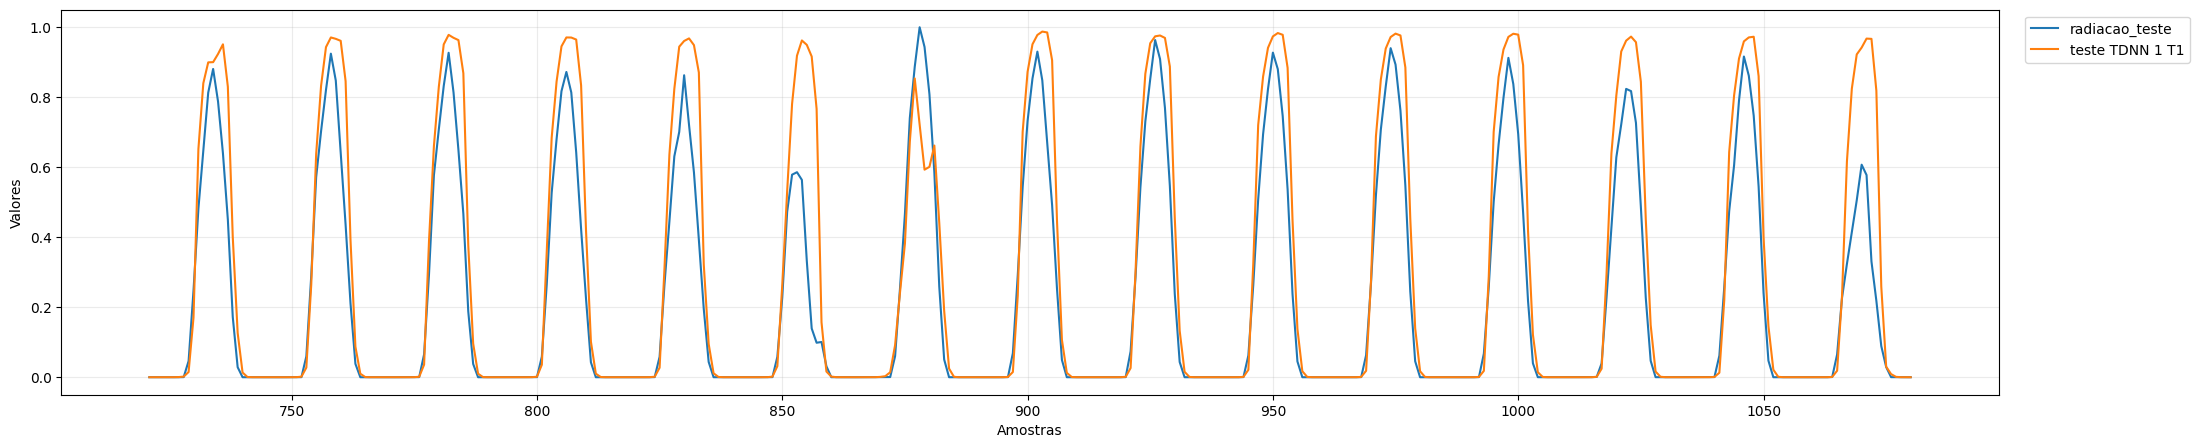

In [183]:
plot_historico(data_top, 2, 'Testes_otimos_TDNN_top.pdf')

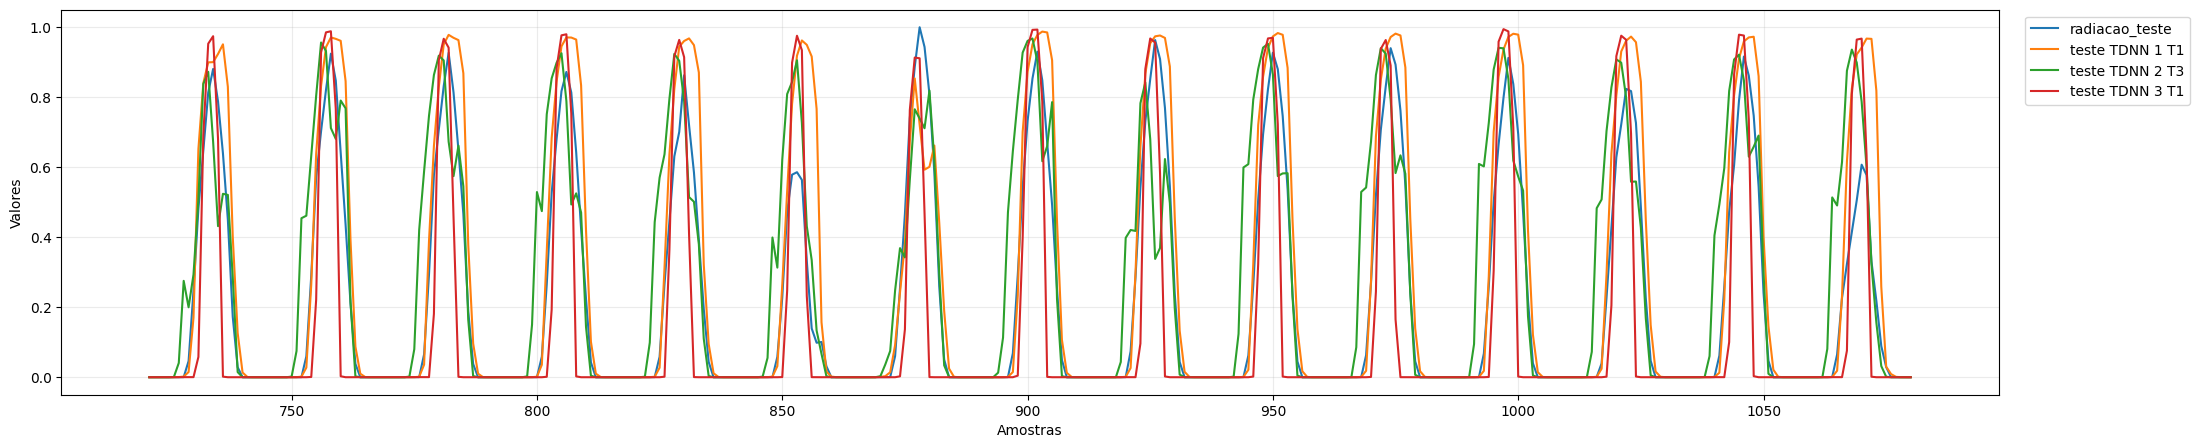

In [177]:
plot_historico(data_yteste, 4, 'Testes_otimos_TDNN.pdf')

---
---

In [30]:
lista_yTDNN = app_treino(data_norm, lista_w1_treino, lista_w2_treino, 0.5, 3, lista_Np)

In [31]:
col_treinos_otimos = ['radiacao', 'radiacao TDNN 1 T1', 'radiacao TDNN 2 T3', 'radiacao TDNN 3 T1']

In [32]:
dados_treinos_otimos = pd.concat([data_norm, lista_yTDNN[0], lista_yTDNN[1], lista_yTDNN[2]], axis=1)

dados_treinos_otimos.columns = col_treinos_otimos

In [3]:
lista_yTDNN = app_treino(data_train_norm, lista_w1_treino, lista_w2_treino, 0.5, 3, lista_Np)

col_treinos_otimos = ['radiacao', 'radiacao TDNN 1 T1', 'radiacao TDNN 2 T3', 'radiacao TDNN 3 T1']

dados_treinos_otimos = pd.concat([data_train_norm, lista_yTDNN[0], lista_yTDNN[1], lista_yTDNN[2]], axis=1)

dados_treinos_otimos.columns = col_treinos_otimos

dados_treinos_otimos.index = dados_treinos_otimos.index - 1

dados_treinos_otimos = dados_treinos_otimos.drop(-1)

NameError: name 'data_norm_treino' is not defined

In [34]:
dados_treinos_otimos = dados_treinos_otimos.drop(-1)

---
---

---

### **ETAPA 3: Implementação, Treino e Testes da Rede PMC de saídas recorrentes às entradas (TDNNm)**

---

---

### **ETAPA 4: Comparação entre os modelos**

---

In [1]:
def app_treino(data, lista_w1_adj, lista_w2_adj, beta, Nt, lista_Np):

    lista_ytreino = []

    # Realiza o calculo do treinamento para cada TDNN
    for i in range(Nt):

        # Prepara a matriz para os calculos
        data_treino, df_treino_entradas, df_treino_alvo = dataframe_to_TDNN(data, lista_Np[i])
        
        X_treino = df_treino_entradas.copy()
        X_treino['bias'] = -1
        X_treino = np.array(X_treino)

        data_ytreino = df_treino_alvo.copy()
        d_treino = np.array(df_treino_alvo)
        d_treino = d_treino.reshape(-1, 1)

        # entradas I_1 e saida Y_1 da camada 1

        I_1 = X_treino.dot(lista_w1_adj[i].T)

        Y_1 = func_ativacao(I_1, beta)

        # Adicao do bias
        Y_1 = pd.DataFrame(Y_1)
        Y_1['bias'] = -1
        Y_1 = np.array(Y_1)
        
        # entrada I_2 e saida Y_2 da camada 2 de saída

        I_2 = (Y_1).dot(lista_w2_adj[i].T)

        Y_2 = func_ativacao(I_2, beta)

        y_calc = pd.DataFrame(Y_2)

        nan_vec = pd.Series([np.nan] * lista_Np[i])

        y_ajust = pd.concat([nan_vec, y_calc], ignore_index=True)
            
        lista_ytreino.append(y_ajust)

    return lista_ytreino

In [37]:
dados_treinos_otimos

,radiacao,radiacao TDNN 1 T1,radiacao TDNN 2 T3,radiacao TDNN 3 T1
0,6.305373e-04,NaN,NaN,NaN
1,4.924991e-04,NaN,NaN,NaN
2,6.476151e-04,NaN,NaN,NaN
3,6.218731e-04,NaN,NaN,NaN
4,5.710394e-04,NaN,NaN,NaN
...,...,...,...,...
715,9.252075e-05,3.651020e-04,1.339104e-07,6.607590e-17
716,0.000000e+00,4.887552e-05,7.849317e-10,9.760326e-18
717,2.655493e-06,8.181766e-06,4.704441e-12,1.173753e-17
718,4.594424e-06,6.352434e-07,2.393454e-14,5.276137e-17


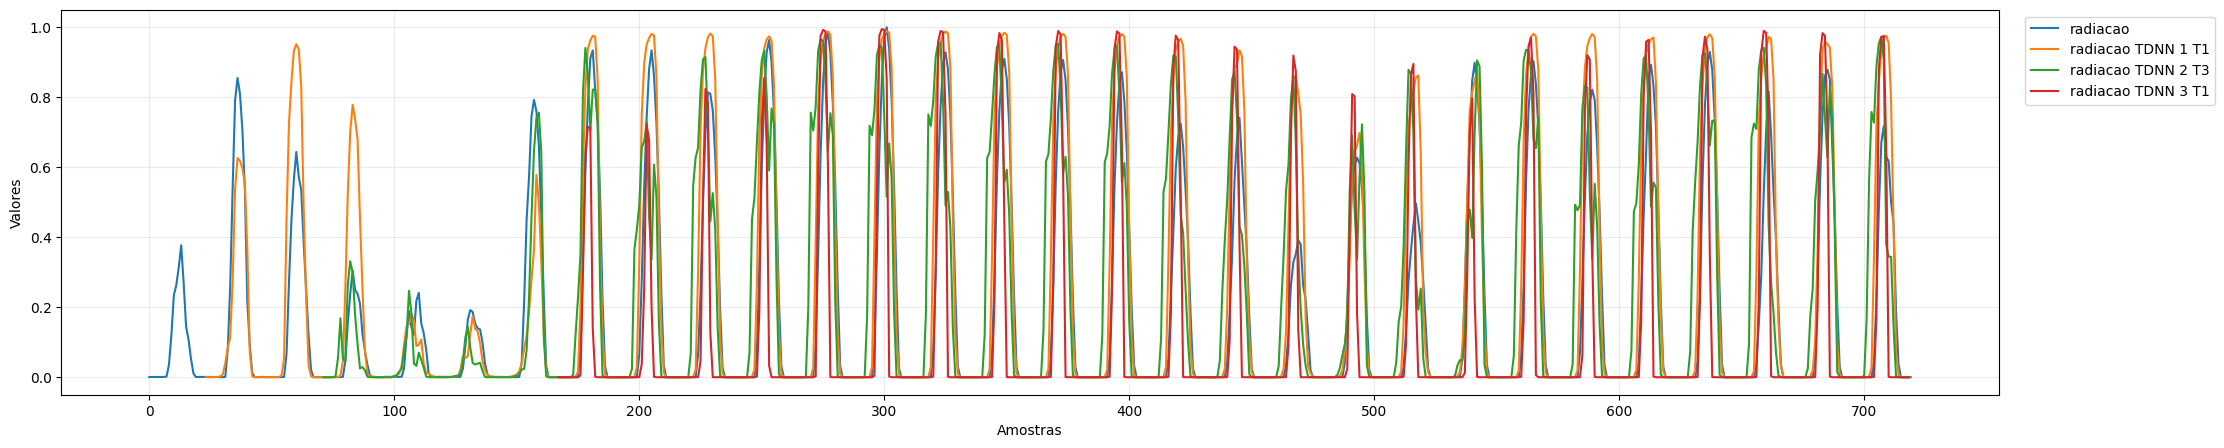

In [38]:
plot_historico(dados_treinos_otimos, 4, 'Treinos_otimos_TDNN.pdf')